In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [2]:
file = Path('crypto_data.csv')

In [3]:
crypto_df = pd.read_csv(file, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
# List all algorithms in use
algo_list = set(crypto_df.Algorithm.values)
print(algo_list)

{'Curve25519', 'Wild Keccak', 'SHA-256 + Hive', 'Slatechain', 'QuBit', 'POS 3.0', '1GB AES Pattern Search', 'SkunkHash', 'Ouroboros', 'DPoS', 'Leased POS', 'Lyra2RE', 'SHA3-256', 'X15', 'Ethash', 'SHA3', 'XG Hash', 'QUAIT', 'Counterparty', 'HybridScryptHash256', 'Jump Consistent Hash', 'Green Protocol', 'Equihash1927', 'HMQ1725', 'CryptoNight', 'Cloverhash', 'X16R', 'ScryptOG', 'XEVAN', '536', 'POS 2.0', 'SkunkHash v2 Raptor', 'Proof-of-BibleHash', 'Keccak', 'YescryptR16', 'SHA-512', 'M7 POW', 'Quark', 'VeChainThor Authority', 'Lyra2Z', 'Argon2d', 'CryptoNight Heavy X', 'Lyra2REv2', 'PHI1612', 'SHA-256', 'Equihash', 'X16S', 'X14', 'Skein', 'CryptoNight-lite', 'Scrypt-n', 'Scrypt', 'Momentum', 'Rainforest', 'X11', 'C11', 'M00N', 'Argon2', 'Blake2b', 'QuarkTX', 'Avesta hash', 'Time Travel', 'NeoScrypt', 'TRC10', 'IMesh', 'Shabal256', 'Multiple', 'Cryptonight-GPU', 'VBFT', 'Dagger-Hashimoto', 'CryptoNight Heavy', 'PoS', 'NIST5', 'Semux BFT consensus', 'vDPOS', 'X11GOST', 'Blake', 'Equihas

In [5]:
# print the counts of stocks being currently traded vs. not being currently traded 
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# Select only cryptocurrencies that are being traded
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
crypto_df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [7]:
# Delete the IsTrading column; it is no longer necessary
crypto_df = crypto_df.drop('IsTrading', axis=1)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
# Delete all rows with null values
crypto_df = crypto_df.dropna(axis=0, how='any')
crypto_df.shape

(685, 5)

In [9]:
# Sort values in TotalCoinsMined to identify negative or zero values
crypto_df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [10]:
# Select only rows with positive TotalCoinsMined values
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
len(crypto_df)

532

In [11]:
# Delete the CoinName column from the original dataframe
crypto_df = crypto_df.drop('CoinName', axis=1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
# Create dummy variables for columns with string values
X = pd.get_dummies(data=crypto_df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After one-hot encoding using get_dummies to convert the Algorithm and ProofType columns from strings to numerical values, the number of columns increased from 4 to 98.

In [13]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# print the scaled data
X_scaled[3]

array([-0.11671506, -0.15255998, -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614,  3.17542648,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951, -0.72111026,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [15]:
# Identify the numbers of rows and columns in the scaled data
X_scaled.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [16]:
# Reduce dimensions with PCA
pca = PCA(n_components=.9)
principal_comp = pca.fit_transform(X_scaled)
principal_comp.shape

(532, 74)

By preserving 90% of the explained variance in dimensionality reduction, or changing the n_components to .9, the number of features decreased from 98 to 74.

In [17]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.47283457566158

In [18]:
# Reduce dimensions with t-SNE
t_SNE = TSNE(perplexity=50)
t_SNE_features = t_SNE.fit_transform(principal_comp)
t_SNE_features.shape

(532, 2)

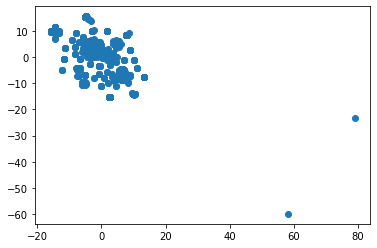

In [19]:
# Plot t-SNE output
x = t_SNE_features[:,0]
y = t_SNE_features[:,1]

plt.scatter(x, y)
plt.show()

After using t-SNE to reduce the dimensions even further, there are no significantly meaningful clusters that are found.

In [20]:
# Identify clusters with k-means
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(principal_comp)
    inertia.append(km.inertia_)

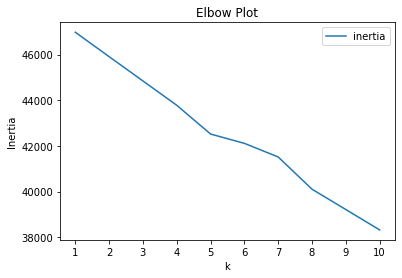

In [21]:
# Create an elbow plot
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow.plot.line(x='k', y='inertia')
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

There is no distinct elbow in the plot which indicates there are no meaningful clusters that can be derived from the dataset.

# Conclusion - 
 - After cleaning and pre-processing the data, the data was then scaled and reduced to determine if any clusters of cryptocurrencies could be identified in order to classify them into investment groups. Based on the results, there are no clusters or groups of cryptocurrencies that could be identified.